### **Fundamentos de Aprendizaje Automático**
### Universidad Autónoma de Madrid, Escuela Politécnica Superior
### Grado en Ingeniería Informática, 4º curso
# **Práctica 3: Regresión Logística y ROC**

## Autores:  
Diego Araque Fernández  
Angela Valderrama Ricaldi

# Introducción  

Esta práctica consta de 4 apartados en las que se trabajará sobre el algoritmo de clasificación de Regresión Logística además del análisis de los diferentes clasificadores implementados en las prácticas anteriores. Este análisis se llevará a cabo mediante el espacio ROC, la curva ROC y el área bajo la curva ROC.
En el primer apartado se prueba nuestra propia implementación de Regresión Logística y se compara con los resultados obtenidos al utilizar la librería de Scikit-Learn en el segundo apartado. Por último, el análisis del espacio ROC se aplica para los clasificadores NaiveBayes, KNN y Regresión Logística, mientras que la curva ROC se aplica sólo para este último.

In [2]:
from Datos import Datos
from EstrategiaParticionado import ValidacionSimple, ValidacionCruzada
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica

import numpy as np
from tabulate import tabulate

In [3]:
# load datasets to test
heart = Datos('datasets/heart.csv')
wdbc = Datos('datasets/wdbc.csv')


# 1. Clasificador Regresión Logística

El clasificador Regresión Logística se ha implementado en el fichero `ClasificadorRegresionLogistica.py`, siendo una clase que hereda de Clasificador y que implementa los métodos de `entrenamiento` y `clasifica`.

Este clasificador lineal tiene como objetivo conseguir el hiperplano que mejor separe las clases maximizando la verosimilitud de los datos. Esto se consigue mediante el algoritmo del descenso por gradiente en el cual se van actualizando los puntos del hiperplano en cada iteración hasta que se alcanza un mínimo.

La probabilidad de que un dato pertenezca a una clase u otra se calcula mediante la función sigmoide, la cual se define como:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

donde $z$ es la función lineal que se define como:

$$z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

donde $w_0$ es el término independiente y $w_1, w_2, ..., w_n$ son los pesos de cada característica.

Cada vez que se termina de aplicar el algoritmo del descenso en el dataset, se completa una época. Cuando se terminan un determinado número de épocas, se llega a unos valores determinados de los pesos que en teoría serían los óptimos para la clasificación.

En nuestro clasificador, el algoritmo del descenso por gradiente se aplica en el método entrenamiento para conseguir los pesos finales que se validarán con los datos de test en el método clasifica. Ya que se usa la función sigmoide para calcular la probabilidad, el umbral para clasificar una dato en una clase u otra es 0.5.

Además, también se aplica la funcionalidad de preproceso de los datos mediante la normalización de éstos que ya hemos observado en prácticas anteriores que supone una mejora en el rendimiento de los clasificadores.

En este caso, hemos optado por probar el clasificador Regresion Logistica con la estrategia de particionado de Validación Simple ya que con las anteriores prácticas apenas hemos observado diferencias entre los resultados obtenidos con esta estrategia y la de Validación Cruzada.

## Heart Dataset

In [8]:
# hold-out validation (10 samples)

vs = ValidacionSimple(10, 0.3)

learning_rates = [0.01, 0.02, 0.1, 0.25, 0.5, 0.75, 1]
epochs = [50, 100, 1000]

combinations = {
    0.01: {},
    0.02: {},
    0.1: {},
    0.25: {},
    0.5: {},
    0.75: {},
    1: {}
}

for lr in learning_rates:
    for epoch in epochs:

        # create classifiers
        mylr = ClasificadorRegresionLogistica(l_rate=lr, n_epochs=epoch, normalize=True)
        mylr_not = ClasificadorRegresionLogistica(l_rate=lr, n_epochs=epoch)

        # validate classifiers
        mylr_heart = mylr.validacion(vs, heart, mylr)
        mylr_heart_not = mylr_not.validacion(vs, heart, mylr_not)

        # get accuracy and error rate
        accuracy_vs_heart = np.mean(1 - np.array(mylr_heart))
        accuracy_vs_heart_not = np.mean(1 - np.array(mylr_heart_not))

        error_rate_vs_heart = 1 - accuracy_vs_heart
        error_rate_vs_heart_not = 1 - accuracy_vs_heart_not

        # save results
        combinations[lr][epoch] = {
            'accuracy_vs_heart': accuracy_vs_heart,
            'accuracy_vs_heart_not': accuracy_vs_heart_not,
            'error_rate_vs_heart': error_rate_vs_heart,
            'error_rate_vs_heart_not': error_rate_vs_heart_not,
        }


In [9]:
for epoch in epochs:
    table_data = []

    for lr in learning_rates:
        row_data = combinations[lr][epoch]
        row = [lr, row_data['accuracy_vs_heart'], row_data['error_rate_vs_heart'],
               row_data['accuracy_vs_heart_not'], row_data['error_rate_vs_heart_not']]
        table_data.append(row)

    headers = ["Learning Rate", "Accuracy", "Error rate", "Accuracy", "Error rate"]
    print(f"\033[1m Number of epochs: {epoch} \033[0m")
    print("\t\t\t[Normalized]\t\t[Not Normalized]")
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))
    print("\n--------------------------------------------------------------------\n")

 Number of epochs: 50 
			[Normalized]		[Not Normalized]
╒═════════════════╤════════════╤══════════════╤════════════╤══════════════╕
│   Learning Rate │   Accuracy │   Error rate │   Accuracy │   Error rate │
╞═════════════════╪════════════╪══════════════╪════════════╪══════════════╡
│            0.01 │   0.765091 │     0.234909 │   0.536    │     0.464    │
├─────────────────┼────────────┼──────────────┼────────────┼──────────────┤
│            0.02 │   0.776987 │     0.223013 │   0.539955 │     0.460045 │
├─────────────────┼────────────┼──────────────┼────────────┼──────────────┤
│            0.1  │   0.752503 │     0.247497 │   0.537143 │     0.462857 │
├─────────────────┼────────────┼──────────────┼────────────┼──────────────┤
│            0.25 │   0.759885 │     0.240115 │   0.539455 │     0.460545 │
├─────────────────┼────────────┼──────────────┼────────────┼──────────────┤
│            0.5  │   0.765062 │     0.234938 │   0.543119 │     0.456881 │
├─────────────────┼────────────

En esta prueba de la Regresión Logística para el dataset de Heart, podemos observar un procentaje de acierto alto, en torno al 80% para los datos normalizados de este set. En cambio, para los datos no normalizados, la tasa de error es mucho más alta, superando el 40% en casi todos los casos.

Cabe destacar, que el dataset de Heart contiene atributos categóricos que han sido codificados para poder usarse en los clasificadores. Como ya hemos comentado en otras prácticas, estos resultados son muy esperables ya que los tipos de atributos influyen mucho en el cómputo de las probabilidades y en la clasificación de los datos.

Por otro lado, respecto a la clasificación y a los hiperparámetros a modificar, se puede resaltar como óptima configuración la combinación de l_rate = 0.02 y n_epochs = 1000, ya que es la que obtiene un porcentaje de acierto más alto.
Además de esta, hay muchas más opciones que producen altos procentajes de acierto como: `l_rate = 0.02 y epoch = 50` o `l_rate = 1 y epoch = 1000`.

Un número pequeño de tasa de aprendizaje supone que el algoritmo del descenso por gradiente dará saltos más pequeños cada vez que se actualicen los datos, mientras que un número muy alto implica mayor velocidad a la hora de minimizar. Esta combinación de hiperparámetros influye en la velocidad a la que se llega a la convergencia y en el número de iteraciones que se realizan.

## WDBC Dataset

In [10]:
# hold-out validation (10 samples)

vs = ValidacionSimple(10, 0.3)

learning_rates = [0.01, 0.02, 0.1, 0.25, 0.5, 0.75, 1]
epochs = [50, 100, 1000]

combinations = {
    0.01: {},
    0.02: {},
    0.1: {},
    0.25: {},
    0.5: {},
    0.75: {},
    1: {}
}

for lr in learning_rates:
    for epoch in epochs:

        # create classifiers
        mylr = ClasificadorRegresionLogistica(l_rate=lr, n_epochs=epoch, normalize=True)
        mylr_not = ClasificadorRegresionLogistica(l_rate=lr, n_epochs=epoch)

        # validate classifiers
        mylr_wdbc = mylr.validacion(vs, wdbc, mylr)
        mylr_wdbc_not = mylr_not.validacion(vs, wdbc, mylr_not)

        # get accuracy and error rate
        accuracy_vs_wdbc = np.mean(1 - np.array(mylr_wdbc))
        accuracy_vs_wdbc_not = np.mean(1 - np.array(mylr_wdbc_not))

        error_rate_vs_wdbc = 1 - accuracy_vs_wdbc
        error_rate_vs_wdbc_not = 1 - accuracy_vs_wdbc_not

        # save results
        combinations[lr][epoch] = {
            'accuracy_vs_wdbc': accuracy_vs_wdbc,
            'accuracy_vs_wdbc_not': accuracy_vs_wdbc_not,
            'error_rate_vs_wdbc': error_rate_vs_wdbc,
            'error_rate_vs_wdbc_not': error_rate_vs_wdbc_not,
        }


In [11]:
for epoch in epochs:
    table_data = []

    for lr in learning_rates:
        row_data = combinations[lr][epoch]
        row = [lr, row_data['accuracy_vs_wdbc'], row_data['error_rate_vs_wdbc'],
               row_data['accuracy_vs_wdbc_not'], row_data['error_rate_vs_wdbc_not']]
        table_data.append(row)

    headers = ["Learning Rate", "Accuracy", "Error rate", "Accuracy", "Error rate"]
    print(f"\033[1m Number of epochs: {epoch} \033[0m")
    print("\t\t\t[Normalized]\t\t[Not Normalized]")
    print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))
    print("\n--------------------------------------------------------------------\n")

 Number of epochs: 50 
			[Normalized]		[Not Normalized]
╒═════════════════╤════════════╤══════════════╤════════════╤══════════════╕
│   Learning Rate │   Accuracy │   Error rate │   Accuracy │   Error rate │
╞═════════════════╪════════════╪══════════════╪════════════╪══════════════╡
│            0.01 │   0.972353 │    0.0276471 │   0.437353 │     0.562647 │
├─────────────────┼────────────┼──────────────┼────────────┼──────────────┤
│            0.02 │   0.971261 │    0.0287395 │   0.534926 │     0.465074 │
├─────────────────┼────────────┼──────────────┼────────────┼──────────────┤
│            0.1  │   0.970407 │    0.0295928 │   0.543655 │     0.456345 │
├─────────────────┼────────────┼──────────────┼────────────┼──────────────┤
│            0.25 │   0.969164 │    0.0308359 │   0.533324 │     0.466676 │
├─────────────────┼────────────┼──────────────┼────────────┼──────────────┤
│            0.5  │   0.967365 │    0.0326353 │   0.536357 │     0.463643 │
├─────────────────┼────────────

Cuando probamos el clasificador de Regresión Logística con el dataset WDBC, obtenemos unos resultados mucho mejores que con el dataset de Heart. En este caso, los porcentajes de acierto son muy altos, superando el 90% en la mayoría de los casos.

Como ya sabemos, el dataset WDBC consta de atributos numéricos en su totalidad y esto supone una gran ventaja para el calsificador Regresión Logística ya que no tiene que realizar ninguna codificación de los datos. Además, la normalización de estos datos, como hemos mencionado antes, añade una mejora más en la clasificación.

A parte de esto, se pueden observar que las configuraciones ideales para la clasificación de este dataset serían las siguientes: l_rate = 0.01 y epoch = 100 para datos normalizados. Sin embargo, para datos no normalizados, es necesario ejecutar muchas más épocas para conseguir un porcentaje de acierto similar al normalizado, siendo los valores de la tasa de aprendizaje menos influyentes en este caso.

# 2. Librería de Scikit-Learn para Regresión Logística 

Para esta parte de la practica decidimos usar la función SGDClassifier de la librería Scikit-Learn, ya que esta función nos permite usar la regresión logística mas parecida a la que implementamos en el apartado anterior. Basicamente en esta somos capaces de indicar la cantidad de epocas y el valor de la tasa de aprendizaje que queramos. Cabe recalcar que tiene mas opciones apra que la tasa de aprendizaje sea optima y calcule la regresión de la manera mas eficiente, pero por motivos de comparar resultadas no usaremos estas opciones.

Para la primera parte de este apartado utilizaremos el dataset de Heart, y para la segunda parte el dataset de WDBC. Al igual que los compararemos usando validación simple y cruzada y de esta forma sabremos como funciona mejor dicho algoritmo.

## Heart Dataset

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics

# heart dataset simple validation
X_heart = heart.datos.iloc[:, :-1].to_numpy()
y_heart = heart.datos.iloc[:, -1].to_numpy()


num_samples = 3

learning_rates = [0.01, 0.02, 0.1, 0.25, 0.5, 0.75, 1]

lr_final = {
    0.01: {},
    0.02: {},
    0.1: {},
    0.25: {},
    0.5: {},
    0.75: {},
    1: {}
}

for lr in learning_rates:

    # global variables as arrays for accuracy and error rate
    accuracy_sv_sgdc_heart_optimal_learning_rate_1000epochs = []
    accuracy_sv_sgdc_heart_optimal_learning_rate_100epochs = []
    accuracy_sv_sgdc_heart_optimal_learning_rate_50epochs = []

    error_rate_sv_sgdc_heart_optimal_learning_rate_1000epochs = []
    error_rate_sv_sgdc_heart_optimal_learning_rate_100epochs = []
    error_rate_sv_sgdc_heart_optimal_learning_rate_50epochs = []

    for i in range(num_samples):
        X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, test_size=0.2, random_state=42)

        # use the SGDC classifier, that is the most similar to our implementation
        sgdc_heart_optimal_learning_rate_1000epochs_sv = SGDClassifier(loss='log_loss', max_iter=1000, tol=None, random_state=42, eta0=lr, learning_rate="constant")
        sgdc_heart_optimal_learning_rate_100epochs_sv = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42, eta0=lr, learning_rate="constant")
        sgdc_heart_optimal_learning_rate_50epochs_sv = SGDClassifier(loss='log_loss', max_iter=50, tol=None, random_state=42, eta0=lr, learning_rate="constant")
    
        # train models with simple validation   
        sgdc_heart_optimal_learning_rate_1000epochs_sv.fit(X_train_heart, y_train_heart)
        sgdc_heart_optimal_learning_rate_100epochs_sv.fit(X_train_heart, y_train_heart)
        sgdc_heart_optimal_learning_rate_50epochs_sv.fit(X_train_heart, y_train_heart)

        # predict models with simple validation
        y_pred_heart_optimal_learning_rate_1000epochs_sv = sgdc_heart_optimal_learning_rate_1000epochs_sv.predict(X_test_heart)
        y_pred_heart_optimal_learning_rate_100epochs_sv = sgdc_heart_optimal_learning_rate_100epochs_sv.predict(X_test_heart)
        y_pred_heart_optimal_learning_rate_50epochs_sv = sgdc_heart_optimal_learning_rate_50epochs_sv.predict(X_test_heart)
    
        # accuracy scores
        accuracy_sv_sgdc_heart_optimal_learning_rate_1000epochs.append(metrics.accuracy_score(y_test_heart, y_pred_heart_optimal_learning_rate_1000epochs_sv))
        accuracy_sv_sgdc_heart_optimal_learning_rate_100epochs.append(metrics.accuracy_score(y_test_heart, y_pred_heart_optimal_learning_rate_100epochs_sv))
        accuracy_sv_sgdc_heart_optimal_learning_rate_50epochs.append(metrics.accuracy_score(y_test_heart, y_pred_heart_optimal_learning_rate_50epochs_sv))
    
        # error rates
        error_rate_sv_sgdc_heart_optimal_learning_rate_1000epochs.append(1 - accuracy_sv_sgdc_heart_optimal_learning_rate_1000epochs[-1])
        error_rate_sv_sgdc_heart_optimal_learning_rate_100epochs.append(1 - accuracy_sv_sgdc_heart_optimal_learning_rate_100epochs[-1])
        error_rate_sv_sgdc_heart_optimal_learning_rate_50epochs.append(1 - accuracy_sv_sgdc_heart_optimal_learning_rate_50epochs[-1])

    # calculate mean accuracy
    accuracy_sv_sgdc_heart_optimal_learning_rate_1000epochs = np.mean(accuracy_sv_sgdc_heart_optimal_learning_rate_1000epochs)
    accuracy_sv_sgdc_heart_optimal_learning_rate_100epochs = np.mean(accuracy_sv_sgdc_heart_optimal_learning_rate_100epochs)
    accuracy_sv_sgdc_heart_optimal_learning_rate_50epochs = np.mean(accuracy_sv_sgdc_heart_optimal_learning_rate_50epochs)

    # calculate mean error rate
    error_rate_sv_sgdc_heart_optimal_learning_rate_1000epochs = np.mean(error_rate_sv_sgdc_heart_optimal_learning_rate_1000epochs)
    error_rate_sv_sgdc_heart_optimal_learning_rate_100epochs = np.mean(error_rate_sv_sgdc_heart_optimal_learning_rate_100epochs)
    error_rate_sv_sgdc_heart_optimal_learning_rate_50epochs = np.mean(error_rate_sv_sgdc_heart_optimal_learning_rate_50epochs)

    # heart dataset cross validation
    folds = 10
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    # global variables as arrays for accuracy and error rate
    accuracy_cv_sgdc_heart_optimal_learning_rate_1000epochs = []
    accuracy_cv_sgdc_heart_optimal_learning_rate_100epochs = []
    accuracy_cv_sgdc_heart_optimal_learning_rate_50epochs = []


    error_rate_cv_sgdc_heart_optimal_learning_rate_1000epochs = []
    error_rate_cv_sgdc_heart_optimal_learning_rate_100epochs = []
    error_rate_cv_sgdc_heart_optimal_learning_rate_50epochs = []


    for train_index, test_index in kf.split(X_heart):
        X_train_heart, X_test_heart = X_heart[train_index], X_heart[test_index]
        y_train_heart, y_test_heart = y_heart[train_index], y_heart[test_index]

        # init models with cross validation
        sgdc_heart_optimal_learning_rate_1000epochs_cv = SGDClassifier(loss='log_loss', max_iter=1000, tol=None, random_state=42, eta0=0.25, learning_rate="constant")
        sgdc_heart_optimal_learning_rate_100epochs_cv = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42, eta0=0.25, learning_rate="constant")
        sgdc_heart_optimal_learning_rate_50epochs_cv = SGDClassifier(loss='log_loss', max_iter=50, tol=None, random_state=42, eta0=0.25, learning_rate="constant")

        # train models with cross validation
        sgdc_heart_optimal_learning_rate_1000epochs_cv.fit(X_train_heart, y_train_heart)
        sgdc_heart_optimal_learning_rate_100epochs_cv.fit(X_train_heart, y_train_heart)
        sgdc_heart_optimal_learning_rate_50epochs_cv.fit(X_train_heart, y_train_heart)

        # predict models with cross validation
        y_pred_heart_optimal_learning_rate_1000epochs_cv = sgdc_heart_optimal_learning_rate_1000epochs_cv.predict(X_test_heart)
        y_pred_heart_optimal_learning_rate_100epochs_cv = sgdc_heart_optimal_learning_rate_100epochs_cv.predict(X_test_heart)
        y_pred_heart_optimal_learning_rate_50epochs_cv = sgdc_heart_optimal_learning_rate_50epochs_cv.predict(X_test_heart)

        # accuracy scores
        accuracy_cv_sgdc_heart_optimal_learning_rate_1000epochs.append(metrics.accuracy_score(y_test_heart, y_pred_heart_optimal_learning_rate_1000epochs_cv))
        accuracy_cv_sgdc_heart_optimal_learning_rate_100epochs.append(metrics.accuracy_score(y_test_heart, y_pred_heart_optimal_learning_rate_100epochs_cv))
        accuracy_cv_sgdc_heart_optimal_learning_rate_50epochs.append(metrics.accuracy_score(y_test_heart, y_pred_heart_optimal_learning_rate_50epochs_cv))

        # error rates
        error_rate_cv_sgdc_heart_optimal_learning_rate_1000epochs.append(1 - accuracy_cv_sgdc_heart_optimal_learning_rate_1000epochs[-1])
        error_rate_cv_sgdc_heart_optimal_learning_rate_100epochs.append(1 - accuracy_cv_sgdc_heart_optimal_learning_rate_100epochs[-1])
        error_rate_cv_sgdc_heart_optimal_learning_rate_50epochs.append(1 - accuracy_cv_sgdc_heart_optimal_learning_rate_50epochs[-1])
    
    # calculate mean accuracy
    accuracy_cv_sgdc_heart_optimal_learning_rate_1000epochs = np.mean(accuracy_cv_sgdc_heart_optimal_learning_rate_1000epochs)
    accuracy_cv_sgdc_heart_optimal_learning_rate_100epochs = np.mean(accuracy_cv_sgdc_heart_optimal_learning_rate_100epochs)
    accuracy_cv_sgdc_heart_optimal_learning_rate_50epochs = np.mean(accuracy_cv_sgdc_heart_optimal_learning_rate_50epochs)

    # calculate mean error rate
    error_rate_cv_sgdc_heart_optimal_learning_rate_1000epochs = np.mean(error_rate_cv_sgdc_heart_optimal_learning_rate_1000epochs)
    error_rate_cv_sgdc_heart_optimal_learning_rate_100epochs = np.mean(error_rate_cv_sgdc_heart_optimal_learning_rate_100epochs)
    error_rate_cv_sgdc_heart_optimal_learning_rate_50epochs = np.mean(error_rate_cv_sgdc_heart_optimal_learning_rate_50epochs)

    # save results
    lr_final[lr] = {

        "accuracy_sv_sgdc_heart_optimal_learning_rate_1000epochs": accuracy_sv_sgdc_heart_optimal_learning_rate_1000epochs,
        "accuracy_sv_sgdc_heart_optimal_learning_rate_100epochs": accuracy_sv_sgdc_heart_optimal_learning_rate_100epochs,
        "accuracy_sv_sgdc_heart_optimal_learning_rate_50epochs": accuracy_sv_sgdc_heart_optimal_learning_rate_50epochs,

        "error_rate_sv_sgdc_heart_optimal_learning_rate_1000epochs": error_rate_sv_sgdc_heart_optimal_learning_rate_1000epochs,
        "error_rate_sv_sgdc_heart_optimal_learning_rate_100epochs": error_rate_sv_sgdc_heart_optimal_learning_rate_100epochs,
        "error_rate_sv_sgdc_heart_optimal_learning_rate_50epochs": error_rate_sv_sgdc_heart_optimal_learning_rate_50epochs,

        "accuracy_cv_sgdc_heart_optimal_learning_rate_1000epochs": accuracy_cv_sgdc_heart_optimal_learning_rate_1000epochs,
        "accuracy_cv_sgdc_heart_optimal_learning_rate_100epochs": accuracy_cv_sgdc_heart_optimal_learning_rate_100epochs,
        "accuracy_cv_sgdc_heart_optimal_learning_rate_50epochs": accuracy_cv_sgdc_heart_optimal_learning_rate_50epochs,

        "error_rate_cv_sgdc_heart_optimal_learning_rate_1000epochs": error_rate_cv_sgdc_heart_optimal_learning_rate_1000epochs,
        "error_rate_cv_sgdc_heart_optimal_learning_rate_100epochs": error_rate_cv_sgdc_heart_optimal_learning_rate_100epochs,
        "error_rate_cv_sgdc_heart_optimal_learning_rate_50epochs": error_rate_cv_sgdc_heart_optimal_learning_rate_50epochs,
    }

# results table for each learning rate
table_heart_sgdc_1000 = []
table_heart_sgdc_100 = []
table_heart_sgdc_50 = []

for lr in learning_rates:

    table_heart_sgdc_1000.append([
        lr,
        lr_final[lr]["accuracy_sv_sgdc_heart_optimal_learning_rate_1000epochs"],
        lr_final[lr]["error_rate_sv_sgdc_heart_optimal_learning_rate_1000epochs"],
        lr_final[lr]["accuracy_cv_sgdc_heart_optimal_learning_rate_1000epochs"],
        lr_final[lr]["error_rate_cv_sgdc_heart_optimal_learning_rate_1000epochs"],
    ])

    table_heart_sgdc_100.append([
        lr,
        lr_final[lr]["accuracy_sv_sgdc_heart_optimal_learning_rate_100epochs"],
        lr_final[lr]["error_rate_sv_sgdc_heart_optimal_learning_rate_100epochs"],
        lr_final[lr]["accuracy_cv_sgdc_heart_optimal_learning_rate_100epochs"],
        lr_final[lr]["error_rate_cv_sgdc_heart_optimal_learning_rate_100epochs"],
    ])

    table_heart_sgdc_50.append([
        lr,
        lr_final[lr]["accuracy_sv_sgdc_heart_optimal_learning_rate_50epochs"],
        lr_final[lr]["error_rate_sv_sgdc_heart_optimal_learning_rate_50epochs"],
        lr_final[lr]["accuracy_cv_sgdc_heart_optimal_learning_rate_50epochs"],
        lr_final[lr]["error_rate_cv_sgdc_heart_optimal_learning_rate_50epochs"],
    ])

print("\nTabla de resultados 1000 epochs - Heart Dataset (Normalizado)\n")
print("\t\t\t[Validación Simple]\t\t[Validación Cruzada]")
print(tabulate(table_heart_sgdc_1000, headers=["Learning Rate", "Accuracy", "Error (Mean)", "Accuracy - CV", "Error (Mean) - CV"], tablefmt="fancy_grid"))

print("\nTabla de resultados 100 epochs - Heart Dataset (Normalizado)\n")
print("\t\t\t[Validación Simple]\t\t[Validación Cruzada]")
print(tabulate(table_heart_sgdc_100, headers=["Learning Rate", "Accuracy", "Error (Mean)", "Accuracy - CV", "Error (Mean) - CV"], tablefmt="fancy_grid"))

print("\nTabla de resultados 50 epochs - Heart Dataset (Normalizado)\n")
print("\t\t\t[Validación Simple]\t\t[Validación Cruzada]")
print(tabulate(table_heart_sgdc_50, headers=["Learning Rate", "Accuracy", "Error (Mean)", "Accuracy - CV", "Error (Mean) - CV"], tablefmt="fancy_grid"))


Tabla de resultados 1000 epochs - Heart Dataset (Normalizado)

			[Validación Simple]		[Validación Cruzada]
╒═════════════════╤════════════╤════════════════╤═════════════════╤═════════════════════╕
│   Learning Rate │   Accuracy │   Error (Mean) │   Accuracy - CV │   Error (Mean) - CV │
╞═════════════════╪════════════╪════════════════╪═════════════════╪═════════════════════╡
│            0.01 │   0.565217 │       0.434783 │        0.629515 │            0.370485 │
├─────────────────┼────────────┼────────────────┼─────────────────┼─────────────────────┤
│            0.02 │   0.793478 │       0.206522 │        0.629515 │            0.370485 │
├─────────────────┼────────────┼────────────────┼─────────────────┼─────────────────────┤
│            0.1  │   0.668478 │       0.331522 │        0.629515 │            0.370485 │
├─────────────────┼────────────┼────────────────┼─────────────────┼─────────────────────┤
│            0.25 │   0.722826 │       0.277174 │        0.629515 │            0.

Para el dataset Heart usamos un rango de 1000, 100 y 50 épocas. Para cada una de estas épocas probamos con distintas tasas de aprendizaje (0.01, 0.02, 0.1, 0.25, 0.5, 0.75, 1). Como vimos en clase, mientras la tasa de aprendizaje es mas pequeña damos saltos mas pequeños al recorrer el gradiente y por lo tanto es posible conseguir la solución óptima. Pero se debe tener en cuenta que si la tasa de aprendizaje es muy pequeña, el algoritmo tardará mas en converger. Por lo tanto, para cada una de las épocas, probamos con distintas tasas de aprendizaje y nos quedamos con la que mejor resultado da. En este caso, el mejor comportamiento lo obtuvimos con 1000 épocas y una tasa de aprendizaje de 0.02, con una tasa de acierto del 79%. 

Estos resultados, en general, son bastante buenos ya que tienen un 80% de acierto, pero es verdad que el implementado por nosotros tiene mayor porcentaje de acierto. Esto se debe a muchas cosas pero principalmente a que la función está pensada a ser usado con otros parámetros con una tasa de aprendizaje adaptiva. En otras palabras, cuando habilitamos ese parámetro, el porcentaje de acierto sube mucho.

Cabe destacar que este dataset no es puramente numérico y se llevaron a cabo una serie de transformaciones para que el algoritmo de clasificación Regresión Logística funcionara. Por ello, el porcentaje de acierto no es tan alto como el que se obetndrá en el siguiente dataset.

## WDBC Dataset

In [12]:
# wdbc dataset simple validation
X_wdbc = wdbc.datos.iloc[:, :-1].to_numpy()
y_wdbc = wdbc.datos.iloc[:, -1].to_numpy()

num_samples = 3

learning_rates = [0.01, 0.02, 0.1, 0.25, 0.5, 0.75, 1]

lr_final = {
    0.01: {},
    0.02: {},
    0.1: {},
    0.25: {},
    0.5: {},
    0.75: {},
    1: {}
}

for lr in learning_rates:
    # global variables as arrays for accuracy and error rate
    accuracy_sv_sgdc_wdbc_optimal_learning_rate_1000epochs = []
    accuracy_sv_sgdc_wdbc_optimal_learning_rate_100epochs = []
    accuracy_sv_sgdc_wdbc_optimal_learning_rate_50epochs = []

    error_rate_sv_sgdc_wdbc_optimal_learning_rate_1000epochs = []
    error_rate_sv_sgdc_wdbc_optimal_learning_rate_100epochs = []
    error_rate_sv_sgdc_wdbc_optimal_learning_rate_50epochs = []

    for i in range(num_samples):

        X_train_wdbc, X_test_wdbc, y_train_wdbc, y_test_wdbc = train_test_split(X_wdbc, y_wdbc, test_size=0.2, random_state=42)

        # use the SGDC classifier, that is the most similar to our implementation
        sgdc_wdbc_optimal_learning_rate_1000epochs_sv = SGDClassifier(loss='log_loss', max_iter=1000, tol=None, random_state=42, eta0=lr, learning_rate="constant")
        sgdc_wdbc_optimal_learning_rate_100epochs_sv = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42, eta0=lr, learning_rate="constant")
        sgdc_wdbc_optimal_learning_rate_50epochs_sv = SGDClassifier(loss='log_loss', max_iter=50, tol=None, random_state=42, eta0=lr, learning_rate="constant")
    
        # train models with simple validation
        sgdc_wdbc_optimal_learning_rate_1000epochs_sv.fit(X_train_wdbc, y_train_wdbc)
        sgdc_wdbc_optimal_learning_rate_100epochs_sv.fit(X_train_wdbc, y_train_wdbc)
        sgdc_wdbc_optimal_learning_rate_50epochs_sv.fit(X_train_wdbc, y_train_wdbc)

        # predict models with simple validation
        y_pred_wdbc_optimal_learning_rate_1000epochs_sv = sgdc_wdbc_optimal_learning_rate_1000epochs_sv.predict(X_test_wdbc)
        y_pred_wdbc_optimal_learning_rate_100epochs_sv = sgdc_wdbc_optimal_learning_rate_100epochs_sv.predict(X_test_wdbc)
        y_pred_wdbc_optimal_learning_rate_50epochs_sv = sgdc_wdbc_optimal_learning_rate_50epochs_sv.predict(X_test_wdbc)
    
        # accuracy scores
        accuracy_sv_sgdc_wdbc_optimal_learning_rate_1000epochs.append(metrics.accuracy_score(y_test_wdbc, y_pred_wdbc_optimal_learning_rate_1000epochs_sv))
        accuracy_sv_sgdc_wdbc_optimal_learning_rate_100epochs.append(metrics.accuracy_score(y_test_wdbc, y_pred_wdbc_optimal_learning_rate_100epochs_sv))
        accuracy_sv_sgdc_wdbc_optimal_learning_rate_50epochs.append(metrics.accuracy_score(y_test_wdbc, y_pred_wdbc_optimal_learning_rate_50epochs_sv))

        # error rates
        error_rate_sv_sgdc_wdbc_optimal_learning_rate_1000epochs.append(1 - accuracy_sv_sgdc_wdbc_optimal_learning_rate_1000epochs[-1])
        error_rate_sv_sgdc_wdbc_optimal_learning_rate_100epochs.append(1 - accuracy_sv_sgdc_wdbc_optimal_learning_rate_100epochs[-1])
        error_rate_sv_sgdc_wdbc_optimal_learning_rate_50epochs.append(1 - accuracy_sv_sgdc_wdbc_optimal_learning_rate_50epochs[-1])

    # calculate mean accuracy
    accuracy_sv_sgdc_wdbc_optimal_learning_rate_1000epochs = np.mean(accuracy_sv_sgdc_wdbc_optimal_learning_rate_1000epochs)
    accuracy_sv_sgdc_wdbc_optimal_learning_rate_100epochs = np.mean(accuracy_sv_sgdc_wdbc_optimal_learning_rate_100epochs)
    accuracy_sv_sgdc_wdbc_optimal_learning_rate_50epochs = np.mean(accuracy_sv_sgdc_wdbc_optimal_learning_rate_50epochs)

    # calculate mean error rate
    error_rate_sv_sgdc_wdbc_optimal_learning_rate_1000epochs = np.mean(error_rate_sv_sgdc_wdbc_optimal_learning_rate_1000epochs)
    error_rate_sv_sgdc_wdbc_optimal_learning_rate_100epochs = np.mean(error_rate_sv_sgdc_wdbc_optimal_learning_rate_100epochs)
    error_rate_sv_sgdc_wdbc_optimal_learning_rate_50epochs = np.mean(error_rate_sv_sgdc_wdbc_optimal_learning_rate_50epochs)

    # wdbc dataset cross validation
    folds = 10
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    # global variables as arrays for accuracy and error rate
    accuracy_cv_sgdc_wdbc_optimal_learning_rate_1000epochs = []
    accuracy_cv_sgdc_wdbc_optimal_learning_rate_100epochs = []
    accuracy_cv_sgdc_wdbc_optimal_learning_rate_50epochs = []

    error_rate_cv_sgdc_wdbc_optimal_learning_rate_1000epochs = []
    error_rate_cv_sgdc_wdbc_optimal_learning_rate_100epochs = []
    error_rate_cv_sgdc_wdbc_optimal_learning_rate_50epochs = []

    for train_index, test_index in kf.split(X_wdbc):

        X_train_wdbc, X_test_wdbc = X_wdbc[train_index], X_wdbc[test_index]
        y_train_wdbc, y_test_wdbc = y_wdbc[train_index], y_wdbc[test_index]

        # init models with cross validation
        sgdc_wdbc_optimal_learning_rate_1000epochs_cv = SGDClassifier(loss='log_loss', max_iter=1000, tol=None, random_state=42, eta0=lr, learning_rate="constant")
        sgdc_wdbc_optimal_learning_rate_100epochs_cv = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42, eta0=lr, learning_rate="constant")
        sgdc_wdbc_optimal_learning_rate_50epochs_cv = SGDClassifier(loss='log_loss', max_iter=50, tol=None, random_state=42, eta0=lr, learning_rate="constant")

        # train models with cross validation
        sgdc_wdbc_optimal_learning_rate_1000epochs_cv.fit(X_train_wdbc, y_train_wdbc)
        sgdc_wdbc_optimal_learning_rate_100epochs_cv.fit(X_train_wdbc, y_train_wdbc)
        sgdc_wdbc_optimal_learning_rate_50epochs_cv.fit(X_train_wdbc, y_train_wdbc)

        # predict models with cross validation
        y_pred_wdbc_optimal_learning_rate_1000epochs_cv = sgdc_wdbc_optimal_learning_rate_1000epochs_cv.predict(X_test_wdbc)
        y_pred_wdbc_optimal_learning_rate_100epochs_cv = sgdc_wdbc_optimal_learning_rate_100epochs_cv.predict(X_test_wdbc)
        y_pred_wdbc_optimal_learning_rate_50epochs_cv = sgdc_wdbc_optimal_learning_rate_50epochs_cv.predict(X_test_wdbc)

        # accuracy scores
        accuracy_cv_sgdc_wdbc_optimal_learning_rate_1000epochs.append(metrics.accuracy_score(y_test_wdbc, y_pred_wdbc_optimal_learning_rate_1000epochs_cv))
        accuracy_cv_sgdc_wdbc_optimal_learning_rate_100epochs.append(metrics.accuracy_score(y_test_wdbc, y_pred_wdbc_optimal_learning_rate_100epochs_cv))
        accuracy_cv_sgdc_wdbc_optimal_learning_rate_50epochs.append(metrics.accuracy_score(y_test_wdbc, y_pred_wdbc_optimal_learning_rate_50epochs_cv))

        # error rates
        error_rate_cv_sgdc_wdbc_optimal_learning_rate_1000epochs.append(1 - accuracy_cv_sgdc_wdbc_optimal_learning_rate_1000epochs[-1])
        error_rate_cv_sgdc_wdbc_optimal_learning_rate_100epochs.append(1 - accuracy_cv_sgdc_wdbc_optimal_learning_rate_100epochs[-1])
        error_rate_cv_sgdc_wdbc_optimal_learning_rate_50epochs.append(1 - accuracy_cv_sgdc_wdbc_optimal_learning_rate_50epochs[-1])

    # calculate mean accuracy
    accuracy_cv_sgdc_wdbc_optimal_learning_rate_1000epochs = np.mean(accuracy_cv_sgdc_wdbc_optimal_learning_rate_1000epochs)
    accuracy_cv_sgdc_wdbc_optimal_learning_rate_100epochs = np.mean(accuracy_cv_sgdc_wdbc_optimal_learning_rate_100epochs)
    accuracy_cv_sgdc_wdbc_optimal_learning_rate_50epochs = np.mean(accuracy_cv_sgdc_wdbc_optimal_learning_rate_50epochs)

    # calculate mean error rate
    error_rate_cv_sgdc_wdbc_optimal_learning_rate_1000epochs = np.mean(error_rate_cv_sgdc_wdbc_optimal_learning_rate_1000epochs)
    error_rate_cv_sgdc_wdbc_optimal_learning_rate_100epochs = np.mean(error_rate_cv_sgdc_wdbc_optimal_learning_rate_100epochs)
    error_rate_cv_sgdc_wdbc_optimal_learning_rate_50epochs = np.mean(error_rate_cv_sgdc_wdbc_optimal_learning_rate_50epochs)

    # save results

    lr_final[lr] = {

        "accuracy_sv_sgdc_wdbc_optimal_learning_rate_1000epochs": accuracy_sv_sgdc_wdbc_optimal_learning_rate_1000epochs,
        "accuracy_sv_sgdc_wdbc_optimal_learning_rate_100epochs": accuracy_sv_sgdc_wdbc_optimal_learning_rate_100epochs,
        "accuracy_sv_sgdc_wdbc_optimal_learning_rate_50epochs": accuracy_sv_sgdc_wdbc_optimal_learning_rate_50epochs,

        "error_rate_sv_sgdc_wdbc_optimal_learning_rate_1000epochs": error_rate_sv_sgdc_wdbc_optimal_learning_rate_1000epochs,
        "error_rate_sv_sgdc_wdbc_optimal_learning_rate_100epochs": error_rate_sv_sgdc_wdbc_optimal_learning_rate_100epochs,
        "error_rate_sv_sgdc_wdbc_optimal_learning_rate_50epochs": error_rate_sv_sgdc_wdbc_optimal_learning_rate_50epochs,

        "accuracy_cv_sgdc_wdbc_optimal_learning_rate_1000epochs": accuracy_cv_sgdc_wdbc_optimal_learning_rate_1000epochs,
        "accuracy_cv_sgdc_wdbc_optimal_learning_rate_100epochs": accuracy_cv_sgdc_wdbc_optimal_learning_rate_100epochs,
        "accuracy_cv_sgdc_wdbc_optimal_learning_rate_50epochs": accuracy_cv_sgdc_wdbc_optimal_learning_rate_50epochs,

        "error_rate_cv_sgdc_wdbc_optimal_learning_rate_1000epochs": error_rate_cv_sgdc_wdbc_optimal_learning_rate_1000epochs,
        "error_rate_cv_sgdc_wdbc_optimal_learning_rate_100epochs": error_rate_cv_sgdc_wdbc_optimal_learning_rate_100epochs,
        "error_rate_cv_sgdc_wdbc_optimal_learning_rate_50epochs": error_rate_cv_sgdc_wdbc_optimal_learning_rate_50epochs,
    }

# results table for each learning rate
table_wdbc_sgdc_1000 = []
table_wdbc_sgdc_100 = []
table_wdbc_sgdc_50 = []

for lr in learning_rates:

    table_wdbc_sgdc_1000.append([
        lr,
        lr_final[lr]["accuracy_sv_sgdc_wdbc_optimal_learning_rate_1000epochs"],
        lr_final[lr]["error_rate_sv_sgdc_wdbc_optimal_learning_rate_1000epochs"],
        lr_final[lr]["accuracy_cv_sgdc_wdbc_optimal_learning_rate_1000epochs"],
        lr_final[lr]["error_rate_cv_sgdc_wdbc_optimal_learning_rate_1000epochs"],
    ])

    table_wdbc_sgdc_100.append([
        lr,
        lr_final[lr]["accuracy_sv_sgdc_wdbc_optimal_learning_rate_100epochs"],
        lr_final[lr]["error_rate_sv_sgdc_wdbc_optimal_learning_rate_100epochs"],
        lr_final[lr]["accuracy_cv_sgdc_wdbc_optimal_learning_rate_100epochs"],
        lr_final[lr]["error_rate_cv_sgdc_wdbc_optimal_learning_rate_100epochs"],
    ])

    table_wdbc_sgdc_50.append([
        lr,
        lr_final[lr]["accuracy_sv_sgdc_wdbc_optimal_learning_rate_50epochs"],
        lr_final[lr]["error_rate_sv_sgdc_wdbc_optimal_learning_rate_50epochs"],
        lr_final[lr]["accuracy_cv_sgdc_wdbc_optimal_learning_rate_50epochs"],
        lr_final[lr]["error_rate_cv_sgdc_wdbc_optimal_learning_rate_50epochs"],
    ])

print("\nTabla de resultados 1000 epochs - WDBC Dataset (Normalizado)\n")
print("\t\t\t[Validación Simple]\t\t[Validación Cruzada]")
print(tabulate(table_wdbc_sgdc_1000, headers=["Learning Rate", "Accuracy", "Error (Mean)", "Accuracy - CV", "Error (Mean) - CV"], tablefmt="fancy_grid"))

print("\nTabla de resultados 100 epochs - WDBC Dataset (Normalizado)\n")
print("\t\t\t[Validación Simple]\t\t[Validación Cruzada]")
print(tabulate(table_wdbc_sgdc_100, headers=["Learning Rate", "Accuracy", "Error (Mean)", "Accuracy - CV", "Error (Mean) - CV"], tablefmt="fancy_grid"))

print("\nTabla de resultados 50 epochs - WDBC Dataset (Normalizado)\n")
print("\t\t\t[Validación Simple]\t\t[Validación Cruzada]")
print(tabulate(table_wdbc_sgdc_50, headers=["Learning Rate", "Accuracy", "Error (Mean)", "Accuracy - CV", "Error (Mean) - CV"], tablefmt="fancy_grid"))


Tabla de resultados 1000 epochs - WDBC Dataset (Normalizado)

			[Validación Simple]		[Validación Cruzada]
╒═════════════════╤════════════╤════════════════╤═════════════════╤═════════════════════╕
│   Learning Rate │   Accuracy │   Error (Mean) │   Accuracy - CV │   Error (Mean) - CV │
╞═════════════════╪════════════╪════════════════╪═════════════════╪═════════════════════╡
│            0.01 │   0.885965 │      0.114035  │        0.926128 │           0.0738722 │
├─────────────────┼────────────┼────────────────┼─────────────────┼─────────────────────┤
│            0.02 │   0.938596 │      0.0614035 │        0.903321 │           0.0966792 │
├─────────────────┼────────────┼────────────────┼─────────────────┼─────────────────────┤
│            0.1  │   0.903509 │      0.0964912 │        0.90683  │           0.0931704 │
├─────────────────┼────────────┼────────────────┼─────────────────┼─────────────────────┤
│            0.25 │   0.666667 │      0.333333  │        0.875251 │           0.12

Para el dataset WDBC, usamos los mismos parámetros que en la prueba del dataset Heart. En cambio, obtuvimos resultados muy diferentes, siendo la mejor combinación ahora: 100 épocas con una tasa de aprendizaje de 0.02.

Esta combinación nos dio una tasa de acierto del 96%. Estos resultados están muy cercanos a la perfección y de esta manera, se puede apreciar por qué el uso de un dataset numérico mejora tanto el uso de estos algoritmos de clasificación. Sabemos que cuando los datos son normalizados y estandarizados, el algoritmo es capaz de encontrar la solución óptima de una manera mas eficiente. Para este set de datos necesitamos muchas menos épocas que en el anterior, exactamente 900 épocas menos. La razón de esto se debe a que este conjunto de datos es más pequeño y como ya mencionamos, es puramente numérico.

# 3. Análisis ROC de los clasificadores

Ya que en las prácticas anteriores y en esta, hemos implementado diferentes clasificadores, es el momento de comparar la eficiencia de cada uno de ellos. Para ello usaremos el espacio ROC, lo cual nos permite comparar la precisión de los clasificadores. En este apartado, haremos uso de los conjuntos de datos anteriores, WDBC y Heart.

In [4]:
import matplotlib.pyplot as plt
from ClasificadorNB import ClasificadorNaiveBayes
from ClasificadorKNN import ClasificadorKNN

## Espacio ROC

Para evaluar la precisión de los clasificadores, usaremos el espacio ROC. Este espacio nos permite comparar la precisión de los clasificadores. Por ello, el paso principal es el cálculo de la matriz de confusión. Esta matriz se basa en el cálculo de los verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Una vez obtenidos estos valores, calculamos la tasa de falsos positivos (valor en eje X) y la tasa de verdaderos positivos (valor en eje Y). Con estos valores ya podemos dibujar es espacio ROC. Cuanto más cerca estén los puntos al (0,1), mejor precisión tendrá le clasificador. 

A continuación, representamos un espacio ROC para cada conjunto de datos, con dos puntos por clasificador según su estrategia de particionado.

### Espacio ROC - Heart Dataset

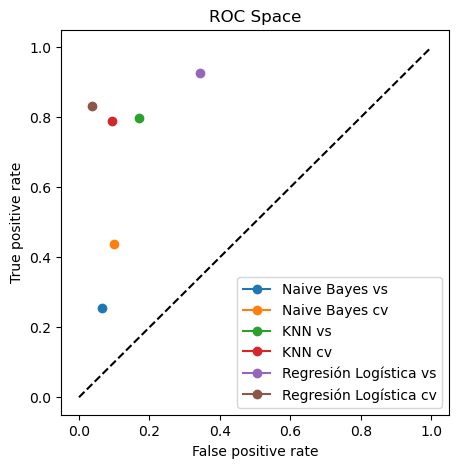

In [9]:
# Roc Analysis for naivabayes, knn and regresion logistica HEART DATASET

# hold-out validation (10 sample)
vs = ValidacionSimple(10, 0.3)
# cross validation (10 folds)
vc = ValidacionCruzada(10)

# Naive Bayes vs
nb_vs = ClasificadorNaiveBayes(laplace=True)
nb_vs.validacion(vs, heart, nb_vs)
conf_matrix_vs_nb = nb_vs.confusion_matrix()
tpr_vs_nb = conf_matrix_vs_nb[0][0] / (conf_matrix_vs_nb[0][0] + conf_matrix_vs_nb[0][1])
fpr_vs_nb = conf_matrix_vs_nb[1][0] / (conf_matrix_vs_nb[1][0] + conf_matrix_vs_nb[1][1])

# Naive Bayes cv
nb_cv = ClasificadorNaiveBayes(laplace=True)
nb_cv.validacion(vc, heart, nb_cv)
conf_matrix_cv_nb = nb_cv.confusion_matrix()
tpr_cv_nb = conf_matrix_cv_nb[0][0] / (conf_matrix_cv_nb[0][0] + conf_matrix_cv_nb[0][1])
fpr_cv_nb = conf_matrix_cv_nb[1][0] / (conf_matrix_cv_nb[1][0] + conf_matrix_cv_nb[1][1])

# KNN vs
knn_vs = ClasificadorKNN(3, normalize=True)
knn_vs.validacion(vs, heart, knn_vs)
conf_matrix_vs_knn = knn_vs.confusion_matrix()
tpr_vs_knn = conf_matrix_vs_knn[0][0] / (conf_matrix_vs_knn[0][0] + conf_matrix_vs_knn[0][1])
fpr_vs_knn = conf_matrix_vs_knn[1][0] / (conf_matrix_vs_knn[1][0] + conf_matrix_vs_knn[1][1])

# KNN cv
knn_cv = ClasificadorKNN(3, normalize=True)
knn_cv.validacion(vc, heart, knn_cv)
conf_matrix_cv_knn = knn_cv.confusion_matrix()
tpr_cv_knn = conf_matrix_cv_knn[0][0] / (conf_matrix_cv_knn[0][0] + conf_matrix_cv_knn[0][1])
fpr_cv_knn = conf_matrix_cv_knn[1][0] / (conf_matrix_cv_knn[1][0] + conf_matrix_cv_knn[1][1])

# Regresion Logistica vs
rl_vs =  ClasificadorRegresionLogistica(n_epochs=1000, l_rate=0.01, normalize=True)
rl_vs.validacion(vs, heart, rl_vs)
conf_matrix_vs_rl = rl_vs.confusion_matrix()
tpr_vs_rl = conf_matrix_vs_rl[0][0] / (conf_matrix_vs_rl[0][0] + conf_matrix_vs_rl[0][1])
fpr_vs_rl = conf_matrix_vs_rl[1][0] / (conf_matrix_vs_rl[1][0] + conf_matrix_vs_rl[1][1])

# Regresion Logistica cv
rl_cv =  ClasificadorRegresionLogistica(n_epochs=1000, l_rate=0.01, normalize=True)
rl_cv.validacion(vc, heart, rl_cv)
conf_matrix_cv_rl = rl_cv.confusion_matrix()
tpr_cv_rl = conf_matrix_cv_rl[0][0] / (conf_matrix_cv_rl[0][0] + conf_matrix_cv_rl[0][1])
fpr_cv_rl = conf_matrix_cv_rl[1][0] / (conf_matrix_cv_rl[1][0] + conf_matrix_cv_rl[1][1])

# plot roc curve
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_vs_nb, tpr_vs_nb, marker='o', label='Naive Bayes vs')
plt.plot(fpr_cv_nb, tpr_cv_nb, marker='o', label='Naive Bayes cv')
plt.plot(fpr_vs_knn, tpr_vs_knn, marker='o', label='KNN vs')
plt.plot(fpr_cv_knn, tpr_cv_knn, marker='o', label='KNN cv')
plt.plot(fpr_vs_rl, tpr_vs_rl, marker='o', label='Regresión Logística vs')
plt.plot(fpr_cv_rl, tpr_cv_rl, marker='o', label='Regresión Logística cv')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Space')
plt.legend(loc='best')
plt.show()

Tras calcular las matrices de confusión de cada uno de los clasificadores y dibujar el espacio ROC, obtuvimos los siguientes resultados:

- La Regresión Logística implementada con la estrategia de particionado Validación Cruzada, presentaba la mejor clasificación, ya que se observa como es la que más se acerca al punto de perfección (0,1). 

- La Regresión Logística implementada con Validación Simple es la que tiene el mejor comportamiento de entre todos los clasificadores usando Validación Simple.

- Los peores clasificadores son los de Naive Bayes, los cuales están muy alejados de clasificar con precisión el dataset.

- Los clasificadores de KNN a pesar de no ser tan prolificos como los de Regresión Logistica, se quedan por detrás por muy poco. En relación a la complejidad de implementación, pensamos que es una muy buena opción para clasificar.

### Espacio ROC - WDBC Dataset

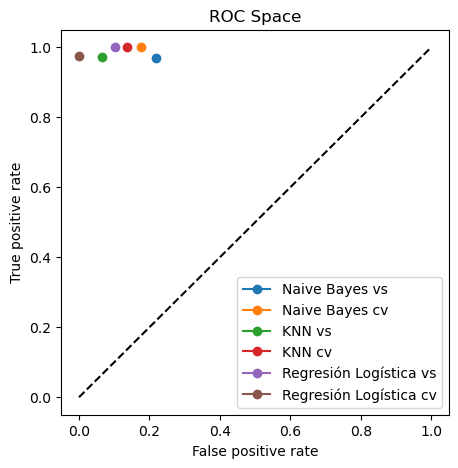

In [7]:
# Roc Analysis for naivabayes, knn and regresion logistica WDBC DATASET

# hold-out validation (10 sample)
vs = ValidacionSimple(10, 0.3)
# cross validation (10 folds)
vc = ValidacionCruzada(10)

# Naive Bayes vs
nb_vs = ClasificadorNaiveBayes(laplace=True)
nb_vs.validacion(vs, wdbc, nb_vs)
conf_matrix_vs_nb = nb_vs.confusion_matrix()
tpr_vs_nb = conf_matrix_vs_nb[0][0] / (conf_matrix_vs_nb[0][0] + conf_matrix_vs_nb[0][1])
fpr_vs_nb = conf_matrix_vs_nb[1][0] / (conf_matrix_vs_nb[1][0] + conf_matrix_vs_nb[1][1])

# Naive Bayes cv
nb_cv = ClasificadorNaiveBayes(laplace=True)
nb_cv.validacion(vc, wdbc, nb_cv)
conf_matrix_cv_nb = nb_cv.confusion_matrix()
tpr_cv_nb = conf_matrix_cv_nb[0][0] / (conf_matrix_cv_nb[0][0] + conf_matrix_cv_nb[0][1])
fpr_cv_nb = conf_matrix_cv_nb[1][0] / (conf_matrix_cv_nb[1][0] + conf_matrix_cv_nb[1][1])

# KNN vs
knn_vs = ClasificadorKNN(3, normalize=True)
knn_vs.validacion(vs, wdbc, knn_vs)
conf_matrix_vs_knn = knn_vs.confusion_matrix()
tpr_vs_knn = conf_matrix_vs_knn[0][0] / (conf_matrix_vs_knn[0][0] + conf_matrix_vs_knn[0][1])
fpr_vs_knn = conf_matrix_vs_knn[1][0] / (conf_matrix_vs_knn[1][0] + conf_matrix_vs_knn[1][1])

# KNN cv
knn_cv = ClasificadorKNN(3, normalize=True)
knn_cv.validacion(vc, wdbc, knn_cv)
conf_matrix_cv_knn = knn_cv.confusion_matrix()
tpr_cv_knn = conf_matrix_cv_knn[0][0] / (conf_matrix_cv_knn[0][0] + conf_matrix_cv_knn[0][1])
fpr_cv_knn = conf_matrix_cv_knn[1][0] / (conf_matrix_cv_knn[1][0] + conf_matrix_cv_knn[1][1])

# Regresion Logistica vs
rl_vs =  ClasificadorRegresionLogistica(n_epochs=500, l_rate=0.01, normalize=True)
rl_vs.validacion(vs, wdbc, rl_vs)
conf_matrix_vs_rl = rl_vs.confusion_matrix()
tpr_vs_rl = conf_matrix_vs_rl[0][0] / (conf_matrix_vs_rl[0][0] + conf_matrix_vs_rl[0][1])
fpr_vs_rl = conf_matrix_vs_rl[1][0] / (conf_matrix_vs_rl[1][0] + conf_matrix_vs_rl[1][1])

# Regresion Logistica cv
rl_cv =  ClasificadorRegresionLogistica(n_epochs=500, l_rate=0.01, normalize=True)
rl_cv.validacion(vc, wdbc, rl_cv)
conf_matrix_cv_rl = rl_cv.confusion_matrix()
tpr_cv_rl = conf_matrix_cv_rl[0][0] / (conf_matrix_cv_rl[0][0] + conf_matrix_cv_rl[0][1])
fpr_cv_rl = conf_matrix_cv_rl[1][0] / (conf_matrix_cv_rl[1][0] + conf_matrix_cv_rl[1][1])

# plot roc curve
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_vs_nb, tpr_vs_nb, marker='o', label='Naive Bayes vs')
plt.plot(fpr_cv_nb, tpr_cv_nb, marker='o', label='Naive Bayes cv')
plt.plot(fpr_vs_knn, tpr_vs_knn, marker='o', label='KNN vs')
plt.plot(fpr_cv_knn, tpr_cv_knn, marker='o', label='KNN cv')
plt.plot(fpr_vs_rl, tpr_vs_rl, marker='o', label='Regresión Logística vs')
plt.plot(fpr_cv_rl, tpr_cv_rl, marker='o', label='Regresión Logística cv')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Space')
plt.legend(loc='best')
plt.show()


Tras calcular las matrices de confusión de cada uno de los clasificadores y dibujar el espacio ROC, obtuvimos resultados muy interesantes.

Para empezar, al ser un dataset plenamente numérico, todos los clasificadores mejoran su comportamiento en comparación con el caso anterior. Ahora, todos los puntos están más cerca del punto de perfección y su lcoalización es muy similar. 

Aun así, la Regresión Logistica con Validación Cruzada es la que mejor comportamiento tiene. Esto se debe a que recorremos el gradiente con la tasa de aprendizaje necesaria para que el algoritmo converja de la mejor manera posible. Como mejora, se podría implementar un learning rate adaptativo como el que tiene la librería de Scikit-Learn, pero estaría fuera de los objetivos de esta práctica.

Finalmente, en ambos espacios ROC observamos el poder que tiene la Regresión Logística, pero con todas las pruebas que hicimos anteriormente nos dimos cuenta que depende mucho de los dos hiperparámetros: tasa de aprendizaje y número de épocas.

La tarea de escoger estos valores correctamente es muy importante para que el algoritmo converja de la mejor manera posible, aunque se trata de un proceso muy tedioso para encontrar estos valores óptimos. Aunque todas nuestras pruebas fueron manuales, nos queda claro que probablemente hay algunos otros pares de valores que dan un mejor comportamiento y serían capaces de aumentar el porcentaje de acierto.

# 4. Curva ROC para Regresión Logística

Como ya sabemos, el clasificador de Regresión Logística es un clasificador lineal que se basa en la función sigmoide para calcular la probabilidad de que un dato pertenezca a una clase u otra. Esta función sigmoidal, especifica un umbral para tomar una decisión u otra según un dato de test o no.

Para poder encontrar el umbral óptimo, se utiliza la curva ROC. La manera más rudimentaria de encontrar ese valor, sería ir variando el umbral hasta que se obtenga el mejor resultado, pero supone un nivel de computación muy alto. Por ello, nuestra implementación se basa en el algoritmo propuesto por Fawcett, en el cual se compara el score obtenido por cada dato de test con el umbral y si este ha variado, se actualiza el umbral.

Hemos elegido el conjunto de datos de WDBC, ya que todos los atributos son numéricos y supone una gran ventaja a la hora de usar los clasificadores. Como hemos visto antes, la tasa de acierto para este dataset rondaba el 90%.

In [22]:
# choose partitioning method
vs = ValidacionSimple(10, 0.3)

# create classifier
mylr = ClasificadorRegresionLogistica(n_epochs=50, l_rate=0.01, normalize=True)

# train classifier
mylr.validacion(vs, wdbc, mylr)

# get fpr and tpr
roc_curve = mylr.roc_curve()

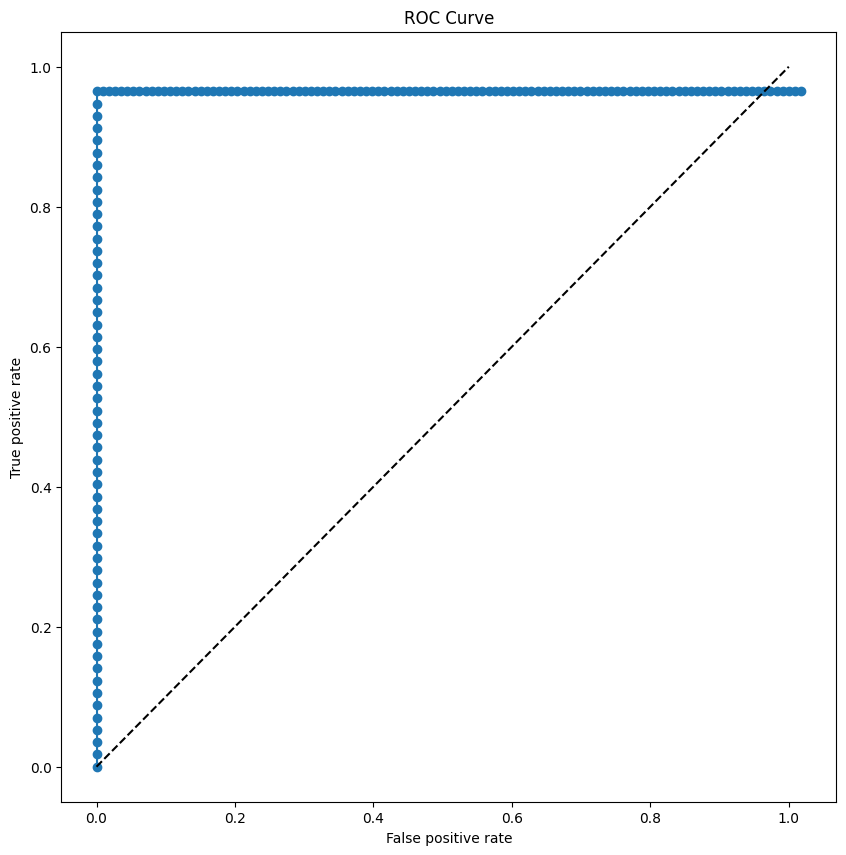

In [24]:
# plot roc curve

# get x and y values
x = []
y = []

for i in range(len(roc_curve)):
    x.append(roc_curve[i][0])
    y.append(roc_curve[i][1])

# plot roc curve
plt.figure(figsize=(10, 10))
plt.plot(x, y, marker='o')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

Como podemos observar, nuestra curva ROC deja un espacio por debajo bastante amplio. El clasificador aleatorio (línea diagonal), deja un espacio bajo la curva de 0.5, indicando que por azar, clasifica cada dato de test en 0 y 1.

En cambio, el clasificador de Regresión Logística, el espacio bajo la curva se asemeja bastante al clasificador perfecto. Cuánto más se acerque la curva a la izquierda, es decir, cuánto más espacio deje por debajo, con más precisión clasificará los datos de test.

En este caso, para una tasa de aprendizaje de 0.01, 50 épocas y los datos normalizados de WDBC, obtenemos una AUC de aproximadamente 0.9, coincidiendo con la tasa de acierto que obtuvimos anteriormente.

El valor AUC óptimo correspondería con 1, indicando así el 100% de precisión del clasificador. 

# 5. Conclusiones

Esta práctica nos ha servido para poder aplicar los conocimientos adquiridos en la clase de teoría en relación a la clasificación de modelos lineales. En este caso, hemos desarrollado nuestra propia implementación del clasificador de Regresión Logística y hemos comparado nuestros resultados con los obtenidos mediante la librería de Scikit-Learn.

Mediante las diferentes pruebas, hemos llegado a la conlusión de que los valores de la tasa de aprendizaje y el número de épocas tienen una gran influencia en el desarrollo del clasificador y por ende en el de los resultados. 

Por último, mediante el análisis ROC, hemos comparado todos los clasificadores implementados en estas últimas prácticas y se han podido observar las diferencias de precisión entre ellos.